## M. Amintoosi
## کاوش الگوهای پرتکرار
استخراج قوانین انجمنی

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/colabs/CoWork/Kohan

/content/drive/My Drive/colabs/CoWork/Kohan


In [17]:
import pandas as pd
import numpy as np
# from orangecontrib.associate.fpgrowth import *
from itertools import tee
from tqdm import tqdm

# df = pd.read_excel(r'matrix20.xlsx') 
df = pd.read_excel(r'results/bestPlants_min_freq_10.xlsx', header=None) 
bf_plants = list(df[0])
# print (list(df[0]))
# metabolitNames = df.head(0).to_string()
# plantNames = list(df.head(0))

In [6]:
numpy_matrix = df.values
d =  numpy_matrix.transpose()
T = [[str(i)[3:] for i in row ] for row in d]
T = [[int(i) for i in row if i != ''] for row in T]
# T[0][:20]

In [7]:
minFreq = 10
itemsets = frequent_itemsets(T, minFreq)
freqIS_list = list(itemsets)
n_freqIS = len(freqIS_list)
print(n_freqIS)

680


In [4]:
minFreq = 10
G_fileName = "results/"+str(minFreq)+"_G"+".npy"
with open(G_fileName, 'rb') as f:
  G = np.load(f)
  Gw = np.load(f)
  featureNames = np.load(f)
  plantNames = np.load(f)
  bow = np.load(f)

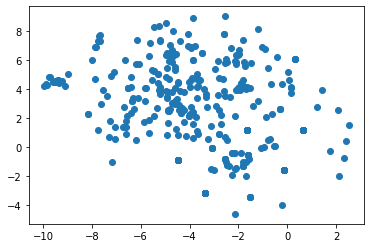

In [19]:
from sklearn.manifold import TSNE

#  TSNE(, perplexity=perplexity,
#                  method="barnes_hut", random_state=42, n_iter=n_iter)
tsne = TSNE(n_components=2, metric='precomputed')
distGraph = 1/(G+0.01)
X_2d = tsne.fit_transform(distGraph)
target_ids = range(2)

from matplotlib import pyplot as plt
# plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
# for i, c, label in zip(target_ids, colors, digits.target_names):
#     plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
# plt.legend()
plt.scatter(X_2d[:, 0], X_2d[:, 1],label=featureNames)
plt.show()                 

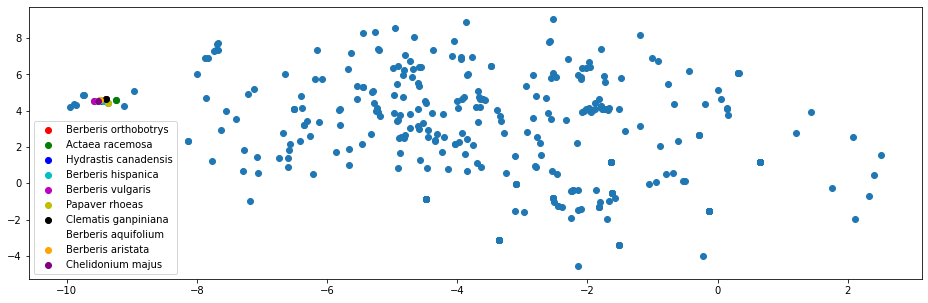

In [25]:
plt.figure(figsize=(16, 5))
plt.scatter(X_2d[:, 0], X_2d[:, 1])
for i in range(10):
    plt.scatter(X_2d[bf_plants[i], 0], X_2d[bf_plants[i], 1],label=plantNames[bf_plants[i]],c=colors[i])
plt.legend()
plt.show()                 

In [9]:
len(plantNames),X_2d.shape

(403, (403, 2))

In [35]:
import networkx as nx
D = nx.Graph(G)

In [38]:
print(nx.is_connected(D))
conComp = list(nx.connected_components(D))
print(conComp[0])

False
{0, 1, 2, 3, 4, 8, 10, 12, 14, 15, 17, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 40, 41, 42, 43, 45, 49, 50, 51, 53, 57, 58, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 78, 80, 82, 83, 84, 86, 87, 88, 89, 94, 95, 97, 98, 99, 101, 102, 103, 105, 106, 107, 108, 109, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 129, 130, 133, 134, 135, 136, 137, 139, 144, 148, 150, 151, 153, 155, 156, 158, 160, 162, 163, 165, 167, 168, 171, 172, 174, 176, 177, 179, 180, 182, 183, 184, 185, 188, 192, 193, 194, 195, 196, 197, 201, 202, 203, 204, 205, 207, 208, 210, 211, 212, 213, 214, 216, 218, 220, 221, 222, 223, 226, 227, 228, 229, 230, 232, 233, 234, 237, 240, 242, 243, 245, 246, 247, 248, 249, 250, 251, 254, 256, 257, 259, 260, 261, 262, 264, 265, 266, 268, 269, 271, 273, 274, 275, 276, 279, 280, 281, 282, 283, 284, 285, 287, 288, 289, 290, 294, 295, 296, 297, 298, 299, 304, 306, 307, 308, 309, 310, 312, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 

In [1]:
# subG = D.subgraph(nodes=list(conComp[0]))
# nx.draw_shell(subG)
# nx.draw_networkx(subG)

In [57]:
min_cut_edges = list(nx.minimum_edge_cut(subG))
min_cut_edges

[(269, 150),
 (65, 150),
 (67, 150),
 (197, 150),
 (95, 150),
 (66, 150),
 (351, 150),
 (68, 150),
 (69, 150)]

In [53]:
copy_subG = subG.copy()
copy_subG.remove_edges_from(min_cut_edges)

In [62]:
conComp = list(nx.connected_components(copy_subG))
subG = D.subgraph(nodes=list(conComp[0]))
# conComp

In [63]:
# در هر دفعه فقط یک نود جدا میشه. اول ۱۵۰ حالا ۲۲۱.
min_cut_edges = list(nx.minimum_edge_cut(subG))
print(min_cut_edges)
copy2_subG = subG.copy()
copy2_subG.remove_edges_from(min_cut_edges)

[(221, 103), (221, 40), (221, 393), (221, 84), (221, 308), (221, 171), (221, 24), (221, 314), (221, 379)]


In [84]:
# type(cut_subG)
# nx.draw_networkx(copy_subG)
# plantNames[150]
import statistics
def amar(a_dic):
    vals = [a_dic[k] for k in a_dic]
    kamine = min(vals)
    bishine = max(vals)
    miangin = statistics.mean(vals)
    return [kamine,bishine,miangin]

d_cen = nx.degree_centrality(D)
# min(d_cen),max(d_cen),statistics.mean(d_cen)
print(amar(d_cen))

[0.0, 0.527363184079602, 0.1187857239855314]


In [85]:
b_cen = nx.betweenness_centrality(D)
print(amar(b_cen))

[0.0, 0.015331981254820626, 0.0008027164906271903]


In [87]:
c_cen = nx.closeness_centrality(D)
print(amar(c_cen))

[0.0, 0.5486491592669563, 0.2508078697418403]


In [90]:
data = c_cen.copy()
import operator
sorted(data.items(), key= operator.itemgetter(1) ,reverse=True)[:10]

[(50, 0.5486491592669563),
 (53, 0.545198535623768),
 (40, 0.5318194304550865),
 (310, 0.5114251750099063),
 (208, 0.49114202359308273),
 (183, 0.4897546167467746),
 (195, 0.48700318631561296),
 (179, 0.4856390317320958),
 (279, 0.4789313102993321),
 (49, 0.47499488857084443)]

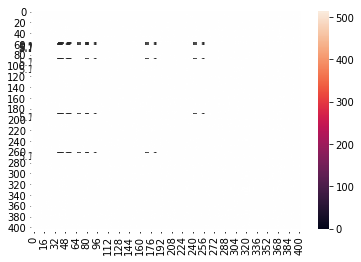

In [26]:
# import seaborn as sns
# sns.heatmap(G, annot=True)

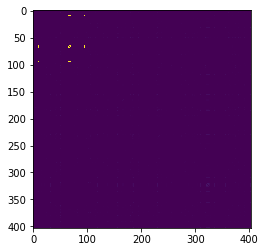

In [27]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(G, interpolation='nearest')
plt.show()